<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
%matplotlib inline

In [2]:
import io
import requests
import ssl
import pandas as pd
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1. Загрузить датасет**

In [3]:
dataset.shape

(284807, 31)

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
dataset[dataset.isna()].count()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# NaN элементы отсутствуют

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [7]:
print(f'Количество мошеннических сделок: {dataset[dataset.Class == 1].Class.count()}')
print(f'Количество честных сделок: {dataset[dataset.Class == 0].Class.count()}')                                                

Количество мошеннических сделок: 492
Количество честных сделок: 284315


[Text(0, 0, 'Честная'), Text(0, 0, 'Мошенническая')]

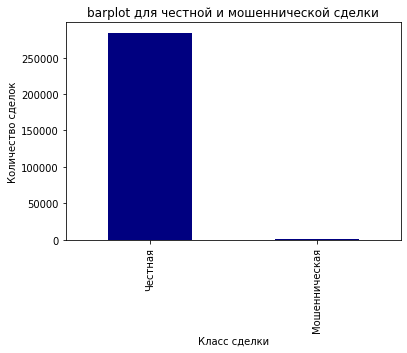

In [8]:
ax = dataset['Class'].value_counts().plot(kind='bar', lw=2, colormap='jet', 
                                          title='barplot для честной и мошеннической сделки')
ax.set_xlabel("Класс сделки")
ax.set_ylabel("Количество сделок")
ax.set_xticklabels(['Честная','Мошенническая'])

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

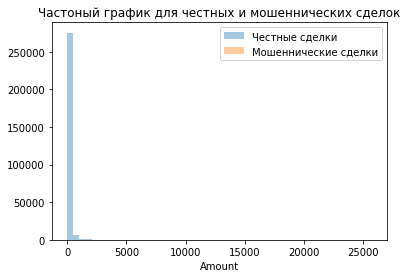

In [9]:
sns.distplot(dataset[dataset['Class'] == 0]['Amount'], 50, kde = False)
sns.distplot(dataset[dataset['Class'] == 1]['Amount'], 50, kde = False)
plt.title('Частоный график для честных и мошеннических сделок')
plt.legend(['Честные сделки', 'Мошеннические сделки'])
plt.show()

In [10]:
# На частотном графике плохо видно распределение, т.к. присутствует малое количество сделок на большие суммы

In [11]:
sum_ = dataset.groupby('Class').agg(['sum'])['Amount'].head()
print(f'Сумма операций по мошенническим сделкам: {round(sum_.iloc[1]["sum"],2)}')
print(f'Сумма операций по честным сделкам: {round(sum_.iloc[0]["sum"],2)}')

Сумма операций по мошенническим сделкам: 60127.97
Сумма операций по честным сделкам: 25102462.04


In [12]:
# Для формирования частотного графика уберём 1% сделок с самыми большими суммами
data_amount_0 = dataset[dataset['Class'] == 0]['Amount']
low = .00
high = .99
quant_amount_0 = data_amount_0.quantile([low, high])
quant_amount_0

0.00       0.0000
0.99    1016.9664
Name: Amount, dtype: float64

In [13]:
filter_amount_0 = data_amount_0[data_amount_0 < quant_amount_0.iloc[1]]

In [14]:
# Для формирования частотного графика уберём 1% сделок с самыми большими суммами
data_amount_1 = dataset[dataset['Class'] == 1]['Amount']
low = .00
high = .99
quant_amount_1 = data_amount_1.quantile([low, high])
quant_amount_1

0.00       0.0000
0.99    1357.4279
Name: Amount, dtype: float64

In [15]:
filter_amount_1 = data_amount_1[data_amount_1 < quant_amount_1.iloc[1]]

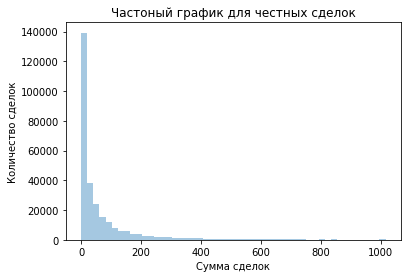

In [16]:
sns.distplot(filter_amount_0, 50, kde = False)
plt.title('Частоный график для честных сделок')
plt.xlabel('Сумма сделок')
plt.ylabel("Количество сделок")
# plt.legend(['Честные сделки', 'Мошеннические сделки'])
plt.show()

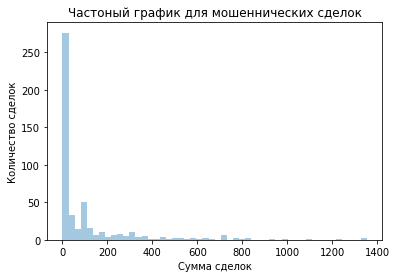

In [17]:
sns.distplot(filter_amount_1, 50, kde = False)
plt.title('Частоный график для мошеннических сделок')
plt.xlabel('Сумма сделок')
plt.ylabel("Количество сделок")
plt.show()

**5. Построить графики histograms для всех значений**

In [18]:
# dataset_part = dataset[:1000]

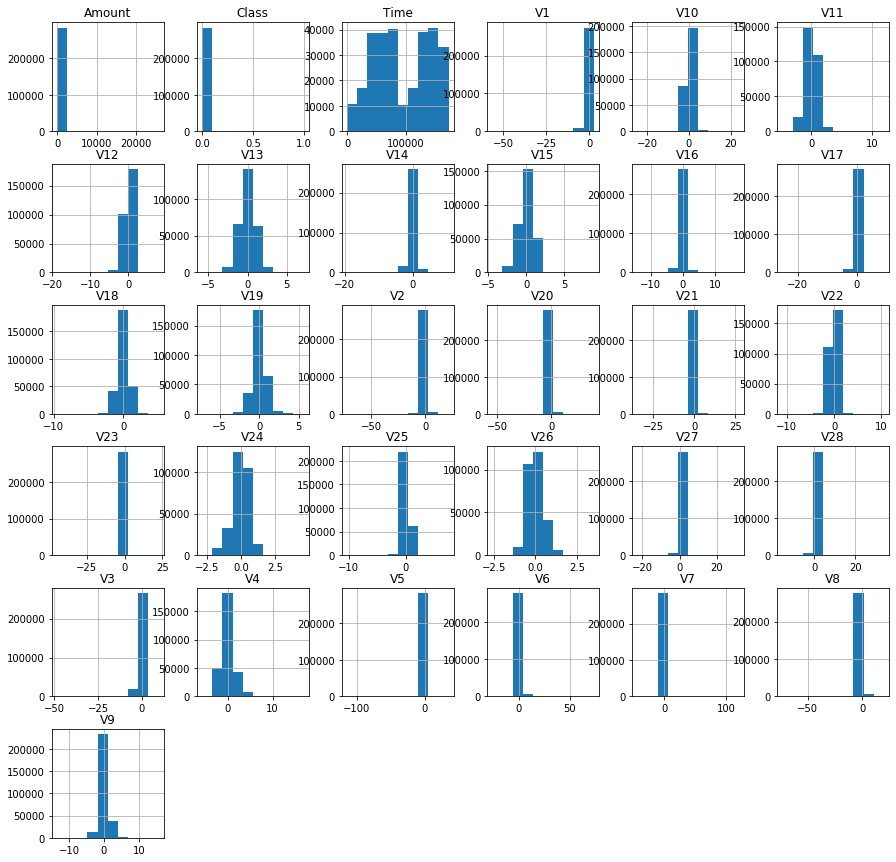

In [19]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [20]:
dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1,0.12,-0.011,-0.42,-0.11,0.17,-0.063,0.085,-0.037,-0.0087,0.031,-0.25,0.12,-0.066,-0.099,-0.18,0.012,-0.073,0.09,0.029,-0.051,0.045,0.14,0.051,-0.016,-0.23,-0.041,-0.0051,-0.0094,-0.011,-0.012
V1,0.12,1,4.7e-17,-1.4e-15,1.8e-17,6.4e-17,2.4e-16,2e-15,-9.5e-17,2.2e-16,7.4e-17,2.4e-16,2.4e-16,-2.1e-16,9.4e-16,-3.3e-16,6.3e-16,-5e-16,2.9e-16,1.8e-16,1e-16,-1.8e-16,7.5e-17,9.8e-16,7.4e-17,-9.8e-16,-8.6e-17,3.2e-17,9.8e-16,-0.23,-0.1
V2,-0.011,4.7e-17,1,2.5e-16,-1.1e-16,-2e-16,5e-16,4e-16,-4.4e-17,-5.7e-17,-4.8e-16,9.5e-16,-6.6e-16,3.9e-16,-2.5e-16,2.8e-16,4.9e-17,-9.9e-16,2.6e-16,9.5e-17,-9.3e-16,8.4e-17,2.5e-16,1.1e-16,-8.1e-18,-4.3e-17,2.6e-16,-4.5e-16,-3.7e-16,-0.53,0.091
V3,-0.42,-1.4e-15,2.5e-16,1,-3.4e-16,-1.4e-15,1.4e-15,2.2e-15,3.4e-16,-4.2e-16,6.3e-16,-5.5e-17,2.2e-16,-6.9e-16,4.3e-16,1.1e-16,1.2e-15,4.6e-17,5.4e-16,2.6e-16,-9.4e-16,-3e-17,4.6e-16,2.1e-17,-9.4e-17,4.8e-16,6.5e-16,6.2e-16,7.7e-16,-0.21,-0.19
V4,-0.11,1.8e-17,-1.1e-16,-3.4e-16,1,-1.9e-15,-2.7e-16,1.6e-16,5.2e-16,3.9e-16,6.1e-16,-2.1e-16,-5.7e-16,-1.5e-16,-8.5e-17,-1.5e-16,-6.9e-16,-4.4e-16,1.5e-16,-2.7e-16,-3.2e-16,-1e-16,2.1e-16,6e-17,2.2e-16,5.4e-16,-6.2e-16,-6.4e-17,-5.9e-17,0.099,0.13
V5,0.17,6.4e-17,-2e-16,-1.4e-15,-1.9e-15,1,7.9e-16,-4.2e-16,7.6e-16,4.2e-16,-6.6e-16,7.3e-16,3.8e-16,-9.6e-16,-3.6e-16,-5.1e-16,-3.5e-16,1.4e-16,1.1e-15,-3.1e-16,2.1e-16,-1.4e-16,5.1e-16,1.6e-16,-9.3e-16,5.6e-16,9.1e-16,4.5e-16,-3.3e-16,-0.39,-0.095
V6,-0.063,2.4e-16,5e-16,1.4e-15,-2.7e-16,7.9e-16,1,1.4e-16,-1.7e-16,1.1e-16,2.9e-16,4.9e-16,2.1e-16,-2.3e-16,3.5e-16,-6.4e-18,-2.5e-16,3.6e-16,2.8e-16,2.7e-16,1.9e-16,-1.6e-16,-3.4e-16,-7.2e-17,-1.3e-15,1.1e-15,-2.4e-16,-2.6e-16,4.8e-16,0.22,-0.044
V7,0.085,2e-15,4e-16,2.2e-15,1.6e-16,-4.2e-16,1.4e-16,1,-8.7e-17,7.9e-16,3e-17,-1.1e-15,1.5e-15,-9.9e-17,-1.7e-16,1.9e-17,2.9e-16,1.1e-15,-1.1e-16,-2.9e-16,1.7e-16,1.9e-16,-1.1e-15,2.3e-16,-2.6e-17,1.2e-15,-7.3e-16,-5.9e-16,-6.8e-17,0.4,-0.19
V8,-0.037,-9.5e-17,-4.4e-17,3.4e-16,5.2e-16,7.6e-16,-1.7e-16,-8.7e-17,1,2.9e-16,9.1e-17,2e-16,-6.3e-17,-2.4e-16,-1.1e-16,2e-16,5e-16,-3.5e-16,-4.1e-16,-5.3e-16,-1.1e-16,-2.4e-16,5.5e-16,3.9e-16,-1.8e-16,-1.4e-16,-1.2e-16,1.7e-16,-4.5e-16,-0.1,0.02
V9,-0.0087,2.2e-16,-5.7e-17,-4.2e-16,3.9e-16,4.2e-16,1.1e-16,7.9e-16,2.9e-16,1,-2.8e-16,4.7e-16,-2.4e-15,-2.7e-16,2.3e-16,-1.6e-15,-3.3e-16,6.5e-16,1.2e-16,1.1e-16,-4.3e-16,4.6e-17,2.9e-17,5.9e-16,-2.3e-16,1.1e-15,-1.4e-15,-2.3e-16,9.1e-16,-0.044,-0.098


**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [21]:
input_x = dataset.iloc[:,:-1] # Все поля кроме Class
output_y = dataset['Class'] # Только поле Class

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(output_y)

In [23]:
# Разделим на 70% тренировочных и на 30% тестовых
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Как делать classification report:

In [25]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.94      0.73      0.82       139

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



0.9994850368081645

In [26]:
# Модель "рандомных деревьев" дала точность предсказания почти 100%.

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [27]:
# Нормализуем данные
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset.iloc[:,:-1])
df_norm = pd.DataFrame(np_scaled)

headers = list(dataset.columns)
df_norm.columns = headers[:-1]
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [28]:
input_x = df_norm
output_y = dataset['Class']

In [29]:
le=LabelEncoder()
Y=le.fit_transform(output_y)

In [30]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [31]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.96      0.78      0.86       150

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9995552590615966

In [33]:
# Модель "рандомных деревьев" на нормализованных данных дала точность предсказания также почти 100%. 
# Смысла нормализовывать данные не было

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_norm,
                                                 Y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [35]:
# Увеличим количество тренировочных данных (тестовые данные остаются нетронутыми)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398048


In [36]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199024, 1: 199024}

In [37]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 85291, 1: 152}

In [38]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_resampled, y_resampled)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.93      0.80      0.86       152

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9995435553526912

In [ ]:
# Модель "рандомных деревьев" на уравновешенных данных  также дала точность предсказания почти 100%. 